In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import pickle
import statistics
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# loading the dataset which has the features (gene symbol)
file_path = 'dataset/ADNI_Gene_Expression_Profile.csv'
df1 = pd.read_csv(file_path)

# loading the dataset with targets (phenotype)
file_path = 'dataset/Complete_ADNI_clinical_info.csv'
df2 = pd.read_csv(file_path)

col = df1.columns[3:747]
# print(len(c))
sampleList = []
for c in col:
    sample = df1.loc[:, c]
    sample = sample.tolist()
    sampleList.append(sample)

tem_col = list(df1['Unnamed: 2'])
tem_col[1] = 'IID'

# final step of making the finalDataFrameWithoutDemographic
finalDataFrame = pd.DataFrame(sampleList, columns=tem_col)
finalDataFrame = finalDataFrame.loc[:, finalDataFrame.columns.notna()]
finalDataFrame = finalDataFrame.drop(columns=['Symbol'])

finalDataFrame['Phenotype'] = ""
finalDataFrame['Age'] = ""
finalDataFrame['Gender'] = ""
finalDataFrame['Ethnicity'] = ""
finalDataFrame['Race'] = ""

for index, row in finalDataFrame.iterrows():
    patientID = finalDataFrame.at[index, 'IID']
    # cell_value = df.at[row_number, column_name]
    #print("P ID: ", patient)
    for index2, row2 in df2.iterrows():
        if df2.at[index2, 'IID'] == patientID:
            finalDataFrame.at[index, 'Phenotype'] = df2.at[index2, 'Phenotype']
            finalDataFrame.at[index, 'Age'] = df2.at[index2, 'Age']
            finalDataFrame.at[index, 'Gender'] = df2.at[index2, 'Gender']
            finalDataFrame.at[index, 'Ethnicity'] = df2.at[index2, 'Ethnicity']
            finalDataFrame.at[index, 'Race'] = df2.at[index2, 'Race']

In [4]:
# finalDataFrame.head()

In [5]:
pickle_file_name = 'keyDictionaryPickel.pickle'
with open(pickle_file_name, 'rb') as file:
    keyDictionary = pickle.load(file)

In [6]:
columns =  set(finalDataFrame.columns)
idxs = finalDataFrame["IID"]

In [7]:
dic = defaultdict(list)
for idx in idxs:
    for col in columns:
        res = keyDictionary.get((idx, col))
        if res:
            dic[col].append(np.mean(res))
lastDf = pd.DataFrame(dic)

In [8]:
# lastDf.head()

In [9]:
originalCol = finalDataFrame.columns
newCol = lastDf.columns
disjointCol = [i for i in originalCol if i not in newCol]
lastDf = lastDf.merge(finalDataFrame[disjointCol], left_index=True, right_index=True)

In [10]:
lastDf.replace("", np.nan, inplace=True)
print(sum(lastDf.isna().sum()))
lastDf = lastDf[lastDf["Phenotype"].notna()].reset_index(drop=True)
print(sum(lastDf.isna().sum()))

80
0


In [11]:
# # creating a smaller dataframe
# c = lastDf.columns
# c = c[19793:20094]
# df = lastDf[c].copy()

In [12]:
# df

In [13]:
# for col in finalDataFrame.columns:
#     if (
#         any(finalDataFrame[col].isna())
#         and finalDataFrame[col].isna().value_counts().to_dict().get(True) / len(finalDataFrame[col])
#         > 0.90
#     ):
#         print(col)
#         finalDataFrame = finalDataFrame.drop(col, axis=1)

In [14]:
features = lastDf.drop('Phenotype', axis = 1)
features = features.drop('IID', axis = 1)
target = lastDf['Phenotype']

In [15]:
dfForColumns = lastDf.drop('Phenotype', axis = 1)
dfForColumns = dfForColumns.drop('IID', axis = 1)

In [16]:
# scaler = MinMaxScaler()

In [17]:
scaler = StandardScaler()

In [18]:
features = scaler.fit_transform(features)

In [19]:
target = target.to_numpy()
print(target[0:10])
# target = target.astype(int)
target = target.astype(int)
print(target[0:10])

[2. 0. 2. 0. 1. 1. 0. 1. 0. 1.]
[2 0 2 0 1 1 0 1 0 1]


In [20]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [21]:
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=100,  
    random_state=42,
)

In [22]:
feat_selector.fit(features, target)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20096
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	20080
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	15
Rejected: 	20080
Iteration: 

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=113,
                                          random_state=RandomState(MT19937) at 0x1EDCBE73040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1EDCBE73040, verbose=2)

In [23]:
# len(feat_selector.support_)

20096

In [27]:
selectedFeatures = []

In [28]:
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
#         print("-------SELECTED--------")
#         print(dfForColumns.columns[i])
#         print(feat_selector.ranking_[i])
        selectedFeatures.append(dfForColumns.columns[i])

In [30]:
X = lastDf[selectedFeatures]

In [33]:
y = lastDf['Phenotype']

In [34]:
y

0      2.0
1      0.0
2      2.0
3      0.0
4      1.0
      ... 
723    2.0
724    1.0
725    1.0
726    0.0
727    2.0
Name: Phenotype, Length: 728, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
y_train = y_train.values
y_test = y_test.values

In [41]:
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

In [42]:
parameterGrid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

In [45]:
gridSearch = GridSearchCV(RandomForestClassifier(), 
                           param_grid=parameterGrid) 
gridSearch.fit(X_train, y_train) 
print(gridSearch.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=133)


In [46]:
model = RandomForestClassifier(n_estimators=133, max_depth=9, max_features='log2', max_leaf_nodes=9, random_state=42)

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=133, random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)

In [52]:
print(accuracy)

0.5273972602739726


In [53]:
cm = confusion_matrix(y_test, y_pred)

In [54]:
cmDF = pd.DataFrame(cm,
                     index = ['Control','MCI','AD'], 
                     columns = ['Control','MCI','AD'])

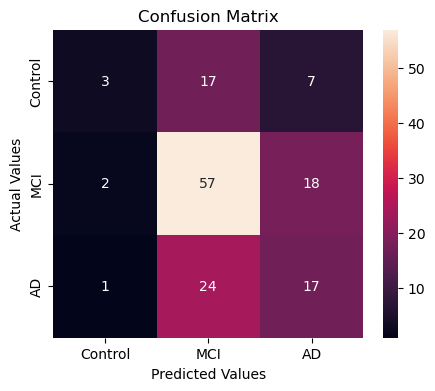

In [59]:
# plotting the confusion matrix to represent the preformance of Random Forest Model
plt.figure(figsize=(5,4))
sns.heatmap(cmDF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()